# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [2]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat  (Links to an external site.)
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  22479      0 --:--:-- --:--:-- --:--:-- 22578
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: (Links
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) 

In [1]:
# Take a peek at the datasets
import pandas as pd
display(pd.read_table('train.dat').head(1))
display(pd.read_table('test.dat').head(1))

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Unnamed: 13
0,1,1,0,0,0,0,0,0,1,1,0,0,1,0


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
1,1,1,1,0,0,1,1,0,0,0,1,1,0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [2]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(array_1_var * array_2_var for array_1_var, array_2_var in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Initializing weights to 0
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Calculating output and error
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
#             print('error:',error)
            #TODO: name these steps
            #updating weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
#             print('weights:',weights)

    return weights

## Run it

In [3]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
```
Because the purpose of the 'train_perceptron(instance, Ir, epochs)' is optimizing weights which can make the error minimize.
If we use 'predict(weights, instance) for the training, output will be 0 or 1. It means weights cannot be updated.
Therefore, we can't use 'predict(weights, instance) for the training process. 
```

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                    f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [6]:
#drawing plots
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
results = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy_test = get_accuracy(weights, instances_te)
            accuracy_train = get_accuracy(weights, instances_tr)
            temp_result = [len(pre_instances), epochs, lr, accuracy_train, accuracy_test]
#             print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
#                     f"Accuracy_train: {accuracy_train:.1f}, Accuracy_test:{accuracy_test:.1f}")
            results.append(temp_result)

In [7]:
df_results= pd.DataFrame(results, columns =['#train', 'epochs','learning rate','Acc_train','Acc_test'])
df_results

,#train,epochs,learning rate,Acc_train,Acc_test
0,20,5,0.005,72.25,68.0
1,20,10,0.005,72.25,68.0
2,20,20,0.005,72.25,68.0
3,20,50,0.005,72.25,68.0
4,20,100,0.005,72.50,68.0
...,...,...,...,...,...
85,400,5,0.050,79.00,69.0
86,400,10,0.050,81.75,76.0
87,400,20,0.050,83.50,80.0
88,400,50,0.050,84.25,80.0


- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
```
In this case, I think it is not necessary. 
Graph below shows some cases have the highest accuracy with the test dataset using all the training dataset, but some cases are not. 
```

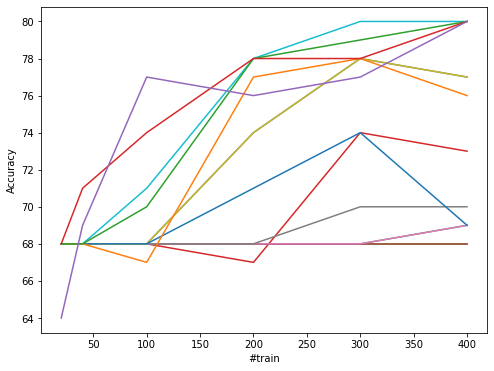

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(8,6))
df_results.groupby(['learning rate','epochs']).plot(x='#train',y='Acc_test',ax=ax,legend=False, ylabel='Accuracy')
plt.show()

- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
    ```
    1. There are likely to have some biases in the training dataset.
    2. The model is likely to be generalized.  
    ```

- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
```
I think that we can get higher accuracy with additional hyperparameters such as adding hidden layers, optimizers, and changing those we used.
I got accuracy of test data changing number of epochs and learing rate, but I was not able to get accuracy higher than 80 in the cases I've ever tried.
```

In [9]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [75, 100] # percent of the training dataset to train with
num_epochs = [100,150,200,500,1000,2000]     # number of epochs
lr_array = [0.005, 0.01, 0.05, 0.1]        # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                    f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 300, epochs: 500, learning rate: 0.005; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs: 1000, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 300, epochs: 2000, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 500, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 1000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 2000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 300, ep

- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
```
Graph below shows it is not always worth.  
There is a overfitting issue.
```

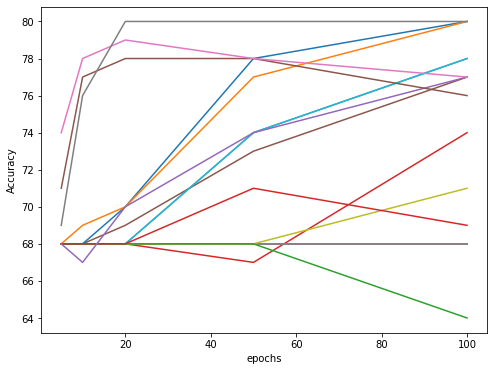

In [10]:
fig2, ax2 = plt.subplots(figsize=(8,6))
df_results.groupby(['learning rate','#train']).plot(x='epochs',y='Acc_test',ax=ax2,legend=False, ylabel='Accuracy')
plt.show()